In [1]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
avogadro_constant = avogadro_constant = 6.022e23
def convert_to_concentration(df,liter):
    for column in range(1,df.shape[1]):
        #print(column)
        df.iloc[:,column] = ((df.iloc[:,column]/avogadro_constant)/liter)
    return df

In [3]:
data_raw = pd.read_csv('concentracoes_tempo_1k.csv',sep=',')
data = convert_to_concentration(data_raw,1)
x = data['Tempo']
y_1 = data['Na']
y_2 = data['Cl']
print(len(y_1),len(y_2))



3120 3120


In [4]:
data

,Tempo,Cl,Na,NaCl
0,0.000000,8.684822e-22,7.920956e-22,0.000000e+00
1,0.016667,8.684822e-22,7.920956e-22,0.000000e+00
2,0.033333,8.668217e-22,7.904351e-22,1.660578e-24
3,0.050000,8.651611e-22,7.887745e-22,3.321156e-24
4,0.066667,8.635005e-22,7.871139e-22,4.981734e-24
...,...,...,...,...
3115,51.916667,1.643972e-22,8.801063e-23,7.040850e-22
3116,51.933333,1.643972e-22,8.801063e-23,7.040850e-22
3117,51.950000,1.643972e-22,8.801063e-23,7.040850e-22
3118,51.966667,1.643972e-22,8.801063e-23,7.040850e-22


In [5]:
def exponential_func(x, a, b):
    return a * np.exp(b * x)


In [6]:
params_1, covariance_1 = curve_fit(exponential_func, x, y_1)
a_fit_1, b_fit_1 = params_1  # Extract the fitted parameters

params_2, covariance_2 = curve_fit(exponential_func, x, y_2)
a_fit_2, b_fit_2 = params_2  # Extract the fitted parameters


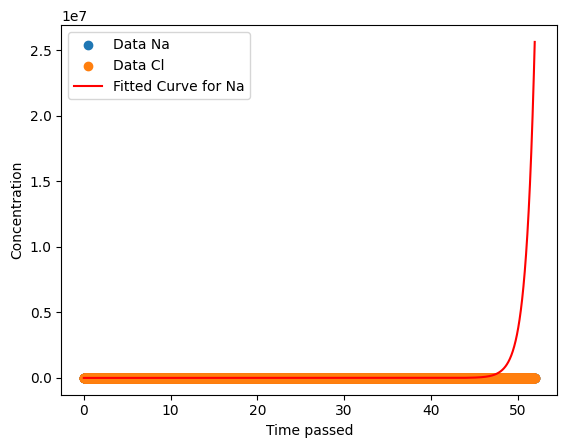

In [8]:
y_fit_1 = (exponential_func(x, a_fit_1, b_fit_1))
y_fit_2 = (exponential_func(x, a_fit_2, b_fit_2))

plt.scatter(x, y_1, label='Data Na')
plt.scatter(x, y_2, label='Data Cl')
plt.plot(x, y_fit_1, label='Fitted Curve for Na', color='red')
#plt.plot(x, y_fit_2, label='Fitted Curve for Cl', color='green')
plt.xlabel('Time passed')
plt.ylabel('Concentration')
plt.legend()
plt.show()
